In [21]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install scikit-learn

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

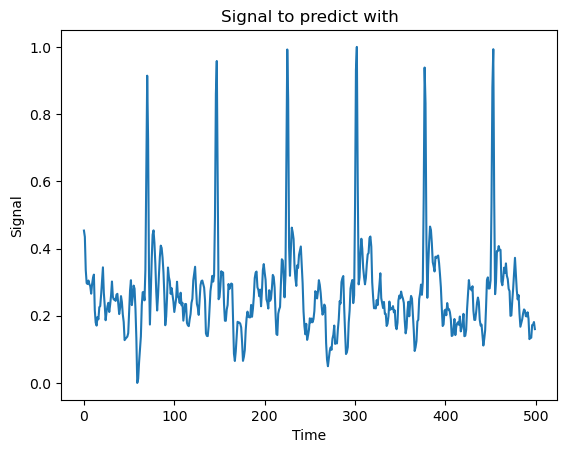

In [23]:
# Load data to predict on
clean_data = pd.read_csv('data/sparc_data.csv')
original_signal = clean_data.iloc[:, 1::].to_numpy()

og_scaler = MinMaxScaler(feature_range=(0,1))
scaled_original_signal = og_scaler.fit_transform(original_signal)

plt.plot(scaled_original_signal)
plt.title('Signal to predict with')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.show()

In [24]:
# Path to your saved model directory or .h5 file
model_path = 'data/pretrained_LSTM.h5'

# Load the pretrained model
model = tf.keras.models.load_model(model_path)

In [25]:
window_size = 20
seed_sequence = np.copy(scaled_original_signal[-window_size:]) 

# List to store predictions
predictions = []
nb_predictions = 50

# Make n predictions
for i in range(nb_predictions):
    # Reshape to model input shape: (1, window_size, 1)
    input_seq = np.reshape(seed_sequence[i:window_size+i], (1, window_size, 1))
    
    # Predict next value (shape will be (1, 1))
    next_val = model.predict(input_seq, verbose=0)[0, 0]
    
    # Append prediction to results
    predictions.append(next_val)
    seed_sequence = np.append(seed_sequence, next_val)
    
predictions = og_scaler.inverse_transform(np.array(predictions).reshape(-1,1)).flatten()

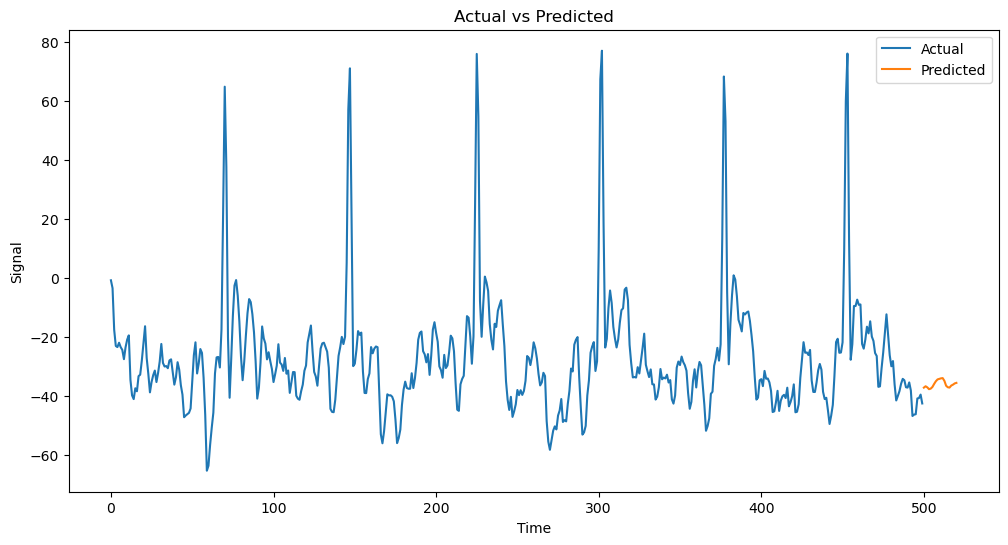

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(original_signal, label='Actual')
plt.plot(np.linspace(len(original_signal), len(original_signal) + nb_predictions, nb_predictions),predictions, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()
plt.show()